## Урок 2.

## Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

In [5]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())

In [6]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())

In [7]:
X1_mean = X[1].mean()

In [8]:
X1_std = X[1].std()

In [9]:
X_st = X.copy().astype(np.float64)

In [10]:
X_st[1] = (X[1] - X1_mean) / X1_std

In [11]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [12]:
X_st[2] = calc_std_feat(X[2])

In [13]:
X_st[3] = calc_std_feat(X[3])

In [14]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.62237387  3.98135168  3.65301451  3.97667725] 103.68515377051169
200 [56.36853468  4.39840046  3.3031134   3.94289186] 41.50714539356625
300 [57.26320753  4.7248175   3.00056432  3.92258767] 40.219055423839606
400 [57.38185864  4.98701615  2.74626393  3.91765402] 40.06562929841276
500 [57.3975941   5.19816505  2.53268102  3.92261653] 39.97450892787877
600 [57.39968093  5.36860603  2.353401    3.93360711] 39.91281951178984
700 [57.39995769  5.50650182  2.20299317  3.94794603] 39.870727129923644
800 [57.39999439  5.61831214  2.07686674  3.96381048] 39.84189811680547
900 [57.39999926  5.70916238  1.971146    3.97999112] 39.822091794957416
1000 [57.3999999   5.78312992  1.88256276  3.99571383] 39.80844882870907


array([57.3999999 ,  5.78312992,  1.88256276,  3.99571383])

In [17]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [18]:
eval_sgd_model(X_st, y, iterations=2000, qty_in_batch=5, alpha=1e-2)

200 [56.41254681  4.87357917  2.95566339  3.85784019] 39.795323659840385
400 [57.38122301  5.29593504  2.49406991  3.89057849] 40.98575676430648
600 [57.39815481  5.57507332  2.17227228  3.93577351] 40.2510467115339
800 [57.39824592  5.75999434  1.94653175  3.97858727] 39.68403865082208
1000 [57.39810537  5.88339422  1.78833902  4.01483064] 39.2770232290543
1200 [57.3980063   5.96628689  1.67759174  4.04372945] 38.986008481127314
1400 [57.39793865  6.02229377  1.60012233  4.06593865] 38.77859014254385
1600 [57.39789233  6.06032639  1.54596657  4.08259293] 38.63123052989917
1800 [57.39786052  6.08626533  1.50812842  4.09486846] 38.52685243309976
2000 [57.39783862  6.10402153  1.48170253  4.1038039 ] 38.4531142750245


array([57.39783862,  6.10402153,  1.48170253,  4.1038039 ])

In [19]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [20]:
np.array([3, 3.5, 1.4, 7.9]) - np.array([0.01, 0.02, 0.005, -0.014])

array([2.99 , 3.48 , 1.395, 7.914])

In [21]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.39479705  5.10767868  2.46037345  4.08674902] 39.981664122534156
1000 [57.39713005  5.765859    1.85689028  4.03893236] 39.80723120406397
1500 [57.39713014  5.99060723  1.60529698  4.06885866] 39.78240504280034
2000 [57.39713014  6.07152025  1.50155606  4.09300748] 39.7785235657889
2500 [57.39713014  6.10185559  1.45905205  4.10572941] 39.777887486171274
3000 [57.39713014  6.11355928  1.44170275  4.11160375] 39.777779304702605
3500 [57.39713014  6.11816175  1.43463681  4.11416107] 39.77775983405892
4000 [57.39713014  6.11999396  1.43176283  4.1152412 ] 39.777755943216036
4500 [57.39713014  6.12072893  1.43059479  4.11568989] 39.77775502451418
5000 [57.39713014  6.12102515  1.4301203   4.11587451] 39.77775476050766


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

__1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).__

In [22]:
k = np.array([])
k.shape = [0, 4]
charts = ['интерсепт', 'стаж', 'стоимость', 'квалификация']
lambdas = list(np.arange(1e-8, 1e-5, 3e-8))

In [23]:
for l in lambdas:
    r = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    k = np.vstack((k, [r]))

500 [57.39766531  5.10794279  2.46013457  4.08693804] 39.98154849413882
1000 [57.39999962  5.76653139  1.85622328  4.03914635] 39.80712258852931
1500 [57.39999971  5.99153666  1.60432674  4.06912265] 39.78234066332436
2000 [57.39999971  6.07258422  1.50040906  4.09331593] 39.77848906219116
2500 [57.39999971  6.10298562  1.45781137  4.1060667 ] 39.77786771988126
3000 [57.39999971  6.11472078  1.44041515  4.11195712] 39.77776605586327
3500 [57.39999971  6.11933796  1.43332655  4.11452269] 39.7777493349922
4000 [57.39999971  6.12117695  1.43044191  4.11560684] 39.77774657967355
4500 [57.39999971  6.12191502  1.42926896  4.11605742] 39.77774612531997
5000 [57.39999971  6.12221264  1.42879223  4.11624291] 39.777746050371924
500 [57.39766445  5.10794272  2.46013464  4.08693799] 39.98154852635076
1000 [57.39999876  5.76653119  1.85622348  4.03914629] 39.8071226186175
1500 [57.39999885  5.99153638  1.60432703  4.06912257] 39.782340680112625
2000 [57.39999885  6.0725839   1.5004094   4.09331584

In [24]:
def plot_chart(chart_index):
    plt.figure()
    plt.plot(lambdas, k[:, chart_index])
    plt.title(charts[chart_index])

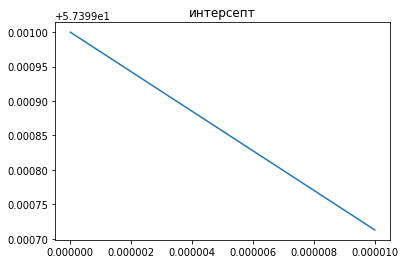

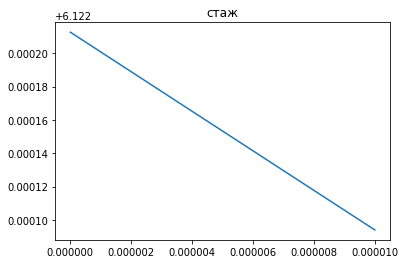

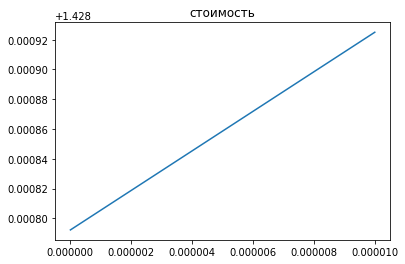

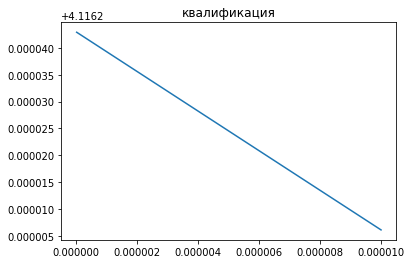

In [25]:
for chart_index in range(X_st.shape[0]):
    plot_chart(chart_index)

__2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?__

Нет, т.к. нормализация переведет все значения в отрезок [0, 1], а стандартизация приведет mean к 0 и std = 1

__3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.__

In [26]:
def eval_model_reg2_(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
    return W

In [27]:
eval_model_reg2_(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])